## Data generation script
This notebook generates the training/ test dataset.

In [1]:
import numpy as np
import pandas as pd

from generate_TF import GenerateTF

# The parameters are:
# phase: phi (-20, 20), with step 1
# gain: dgoo: (1e-4, 1e-2), 20 steps in total

def func(a, b, c, x):
    # 2nd degree polynomial
    # return a * x**2 + b * x + c
    # random, non-linear function
    return a * x**2 * np.sin(b * x) + c * x


In [2]:
# Number of curves to generate. This will be the total number of training/ testing data.
# Number of samples per curve.
# points = 1 << 10

# Generate all combinations
a_lst = np.arange(-20, 20+0.5, 1)
b_lst = np.linspace(1e-4, 1e-2, 20)

# For each of these configs we can generate multiple datasets, since they are generated randomly
c_lst = [None] * 10 # this will generate 10 random instances per configuration

num_curves = len(a_lst) * len(b_lst) * len(c_lst)
print('Total number of datasets: ', num_curves)

Total number of datasets:  8200


In [3]:
df = pd.DataFrame(columns=['phi', 'g_oo', 'x', 'y'])

In [4]:
for a in a_lst:
    for b in b_lst:
        for c in c_lst:
            gen_tf = GenerateTF(fb_attn_index=3)
            x = gen_tf.frequency
            # Draw the random points, following the normal distribution
            # y = func(a, b, c, x)
            y = gen_tf(x, a, b)
            # add to the dataframe
            df = df.append({'phi': a, 'g_oo': b, 'x': x, 'y': y}, ignore_index=True)

In [5]:
df.head()

,phi,g_oo,x,y
0,-20.0,0.0001,"[-1619443.0, -1614543.0211800302, -1609643.042...","[-28.17844516431674, -29.995330137199815, -26...."
1,-20.0,0.0001,"[-1619443.0, -1614543.0211800302, -1609643.042...","[-21.519000119295377, -20.82520269965962, -23...."
2,-20.0,0.0001,"[-1619443.0, -1614543.0211800302, -1609643.042...","[-22.78282633317538, -23.116844835167647, -23...."
3,-20.0,0.0001,"[-1619443.0, -1614543.0211800302, -1609643.042...","[-19.483532441089714, -25.181283644031062, -34..."
4,-20.0,0.0001,"[-1619443.0, -1614543.0211800302, -1609643.042...","[-24.21908363783242, -27.164085696072963, -24...."


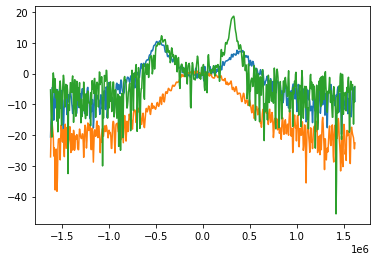

In [10]:
%matplotlib inline

from matplotlib import pyplot as plt

for index, row in df.sample(n=3).iterrows():
    y = row['y']
    x = row['x']
    # label = f'm{m}-s{s}'
    plt.plot(x, y)
plt.show()

In [11]:
df.to_pickle('./data/transfer-functions.pkl')